In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [15]:
#Definerer verdier fra oppgaven
C=0.21
rho=1.23 #kg/m^3
A=2.33 # m^2
M=2250 # kg
d=10_000 # m

vmax_a = 80 #km/h
vmax_b = 100 #km/h

In [10]:
def joule_to_kWh(joules):
    return joules * 2.77810**(-7)

In [31]:
def km_per_h_to_m_per_s(km_per_h):
    return km_per_h *1000/3600

In [59]:
print("a)")

air_resistance_a = (1/2) * rho * A * C * km_per_h_to_m_per_s(vmax_a)**2 #80 km/h
air_resistance_b = (1/2) * rho * A * C * km_per_h_to_m_per_s(vmax_b)**2 #100 km/h

W_a = air_resistance_a * d
W_b = air_resistance_b * d

print(f"Luftmotstandens arbeid ved 80km/t: {round(joule_to_kWh(W_a), 1)} kWh")
print(f"Luftmotstandens arbeid ved 100km/t: {round(joule_to_kWh(W_b), 1)} kWh")

a)
Luftmotstandens arbeid ved 80km/t: 1163.6 kWh
Luftmotstandens arbeid ved 100km/t: 1818.1 kWh


In [32]:
def v(t,vmax):
    v=0.5*km_per_h_to_m_per_s(vmax)*(np.sin((np.pi/10)*t-np.pi/2)+1)
    return v

b)


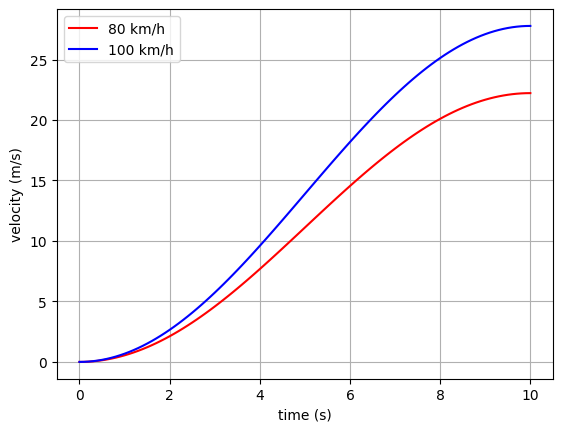

In [51]:
print("b)")

t = np.linspace(0,10,101)
plt.plot(t, v(t, vmax_a), label="80 km/h", color = "red")
plt.plot(t, v(t, vmax_b), label="100 km/h", color = "blue")
plt.legend()

plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
plt.grid()
plt.show()

In [60]:
print("c)")

result_distance_80,err = integrate.quad(v, 0, 10,args=vmax_a)
result_distance_100,err = integrate.quad(v, 0, 10,args=vmax_b)

print("Integral av fartsgraf de første 10 sekundene --> Strekning:")
print(f"Distanse kjørt ved max 80 km/h: {round(result_distance_80, 1)} m")
print(f"Distanse kjørt ved max 100 km/h: {round(result_distance_100, 1)} m")

c)
Integral av fartsgraf de første 10 sekundene --> Strekning:
Distanse kjørt ved max 80 km/h: 111.1 m
Distanse kjørt ved max 100 km/h: 138.9 m


In [57]:
print("d)")

print("Kinetisk energi:")
print(f"80 km/h: {round(joule_to_kWh(kinetic_energy(80)), 1)} kWh")
print(f"100 km/h: {round(joule_to_kWh(kinetic_energy(100)), 1)} kWh")

d)
Kinetisk energi:
80 km/h: 435.0 kWh
100 km/h: 679.7 kWh


In [40]:
def drag_effect(t,vmax):
    return 0.5*A*rho*C*v(t,vmax)**3


In [62]:
print("e)")

result_80,err = integrate.quad(drag_effect, 0, 10,args=vmax_a)
result_100,err = integrate.quad(drag_effect, 0, 10,args=vmax_b)

print(f"Arbeid utført av friksjon ved max 80 km/h: {round(result_80, 1)} J")
print(f"Arbeid utført av friksjon ved max 100 km/h: {round(result_100, 1)} J")

e)
Arbeid utført av friksjon ved max 80 km/h: 10319.6 J
Arbeid utført av friksjon ved max 100 km/h: 20155.5 J


In [79]:
print("f)")

R_a = drag_effect(10, vmax_a)/ km_per_h_to_m_per_s(vmax_a)
W_total_a = R_a*(d - 2*result_distance_80) + 2*result_80
print(f"Totalt arbeid ved max 80 km/h: {round(joule_to_kWh(W_total_a), 1)} kWh")

R_b = drag_effect(10, vmax_b)/ km_per_h_to_m_per_s(vmax_b)
W_total_b = R_b*(d - 2*result_distance_100) + 2*result_100
print(f"Totalt arbeid ved max 100 km/h: {round(joule_to_kWh(W_total_b), 1)} kWh")

f)
Totalt arbeid ved max 80 km/h: 1153.9 kWh
Totalt arbeid ved max 100 km/h: 1799.1 kWh


In [83]:
print("g)")

t_a = 20 + ((d - 2*result_distance_80)/ km_per_h_to_m_per_s(vmax_a)) #s
t_b = 20 + ((d - 2*result_distance_100)/ km_per_h_to_m_per_s(vmax_b)) #s

P_a = W_total_a / t_a
P_b = W_total_b / t_b

print(f"Effekttapet er ved 80km/h: {round(P_a, 1)} W")
print(f"Effekttapet er ved 80km/h: {round(P_b, 1)} W")

g)
Effekttapet er ved 80km/h: 3203.6 W
Effekttapet er ved 80km/h: 6210.1 W
